In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dir_path = "../results/"
results = pd.read_csv(f"{dir_path}global_results_ev.csv", encoding='utf-8')
print(results.shape)
results.head()

(18, 6)


,group,precision,recall,f1-score,support,method
0,Advertencia,0.602941,0.931818,0.732143,44.000000,RH
1,Error,0.992424,0.949275,0.970370,138.000000,RH
2,Informativo,0.975000,0.847826,0.906977,138.000000,RH
3,accuracy,0.903125,0.903125,0.903125,0.903125,RH
4,macro avg,0.856788,0.909640,0.869830,320.000000,RH


In [18]:
set(results["method"])

{'RH', 'TF_IDF', 'Word2Vec'}

In [14]:
res_df_global=results[results["group"]=='macro avg']
res_df_global.head()

,group,precision,recall,f1-score,support,method
4,macro avg,0.856788,0.90964,0.86983,320.0,RH
10,macro avg,0.990000,0.99000,0.99000,320.0,TF_IDF
16,macro avg,0.990000,0.98000,0.98000,320.0,Word2Vec


In [20]:
# Filtrar solo las métricas por clase (ignorar accuracy y promedios globales)
df_clases = results[results['group'].isin(['Error', 'Advertencia', 'Informativo'])]
df_clases

,group,precision,recall,f1-score,support,method
0,Advertencia,0.602941,0.931818,0.732143,44.0,RH
1,Error,0.992424,0.949275,0.970370,138.0,RH
2,Informativo,0.975000,0.847826,0.906977,138.0,RH
6,Advertencia,1.000000,1.000000,1.000000,44.0,TF_IDF
7,Error,1.000000,0.980000,0.990000,138.0,TF_IDF
8,Informativo,0.980000,1.000000,0.990000,138.0,TF_IDF
12,Advertencia,1.000000,0.950000,0.980000,44.0,Word2Vec
13,Error,0.970000,0.990000,0.980000,138.0,Word2Vec
14,Informativo,0.990000,0.990000,0.990000,138.0,Word2Vec


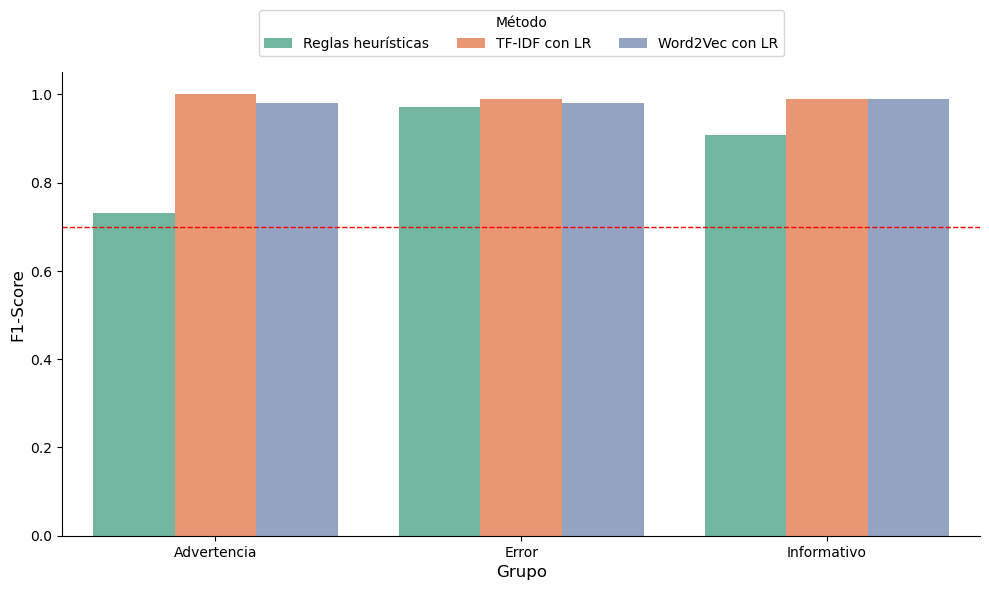

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta personalizada con colores en formato HTML
custom_palette = {
    'RH': '#66c2a5',        # verde claro
    'TF_IDF': '#fc8d62',    # naranja
    'Word2Vec': '#8da0cb'   # azul lavanda
}

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras
sns.barplot(
    data=df_clases,
    x="group",
    y="f1-score",
    hue="method",
    palette=custom_palette,
    ax=ax
)

# Etiquetas y título
ax.set_title("", fontsize=14, pad=15)
ax.set_xlabel("Grupo", fontsize=12)
ax.set_ylabel("F1-Score", fontsize=12)
ax.set_ylim(0, 1.05)

# Línea base de referencia
ax.axhline(0.7, ls='--', color='red', linewidth=1)
ax.text(
    x=-0.4, y=0.715, s="", color='red', fontsize=10, va='bottom'
)

# Leyenda personalizada
method_titles = {
    'RH': 'Reglas heurísticas',
    'TF_IDF': 'TF-IDF con LR',
    'Word2Vec': 'Word2Vec con LR'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [method_titles.get(label, label) for label in labels]
ax.legend(handles, new_labels, title="Método", loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Ajustes visuales finales
sns.despine()
plt.tight_layout()
plt.show()


In [16]:
# Reorganizar los datos para graficar
df_melted = df_clases.melt(
    id_vars=['group', 'method'],
    value_vars=['precision', 'recall'],
    var_name='metric',
    value_name='value'
)


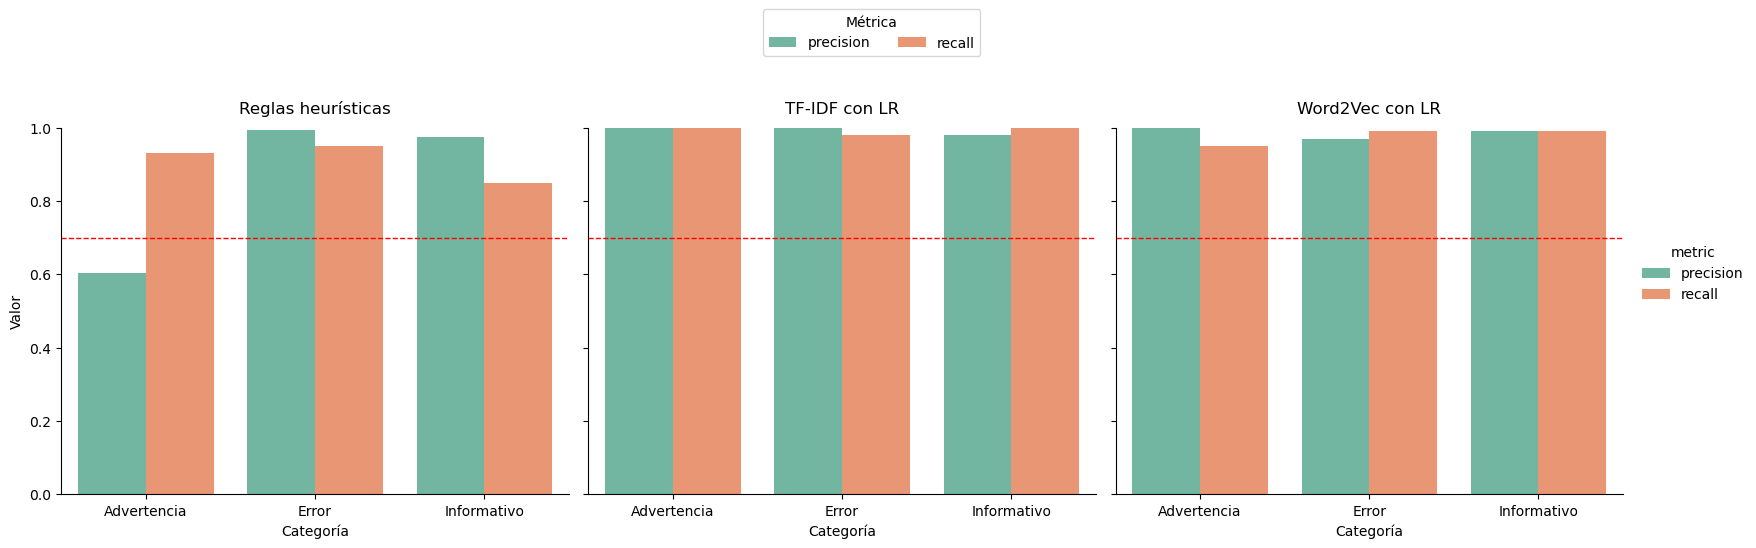

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta personalizada con colores HTML para métricas
custom_palette = {
    'precision': '#66c2a5',  # verde claro
    'recall': '#fc8d62'      # naranja
}

# Filtrar solo métricas relevantes
filtered_data = df_melted[df_melted['metric'].isin(['precision', 'recall'])]

# Crear gráfico por método (cada método en una columna)
g = sns.catplot(
    data=filtered_data,
    kind='bar',
    x='group',
    y='value',
    hue='metric',
    col='method',
    palette=custom_palette,
    height=5,
    aspect=1.1,
    sharey=True
)

# Títulos personalizados para cada panel
method_titles = {
    'RH': 'Reglas heurísticas',
    'TF_IDF': 'TF-IDF con LR',
    'Word2Vec': 'Word2Vec con LR'
}

# Aplicar títulos personalizados
for ax, method in zip(g.axes.flat, g.col_names):
    ax.set_title(method_titles.get(method, method), fontsize=12, pad=10)
    ax.axhline(0.7, ls='--', color='red', linewidth=1)

# Etiquetas generales
g.set_axis_labels("Categoría", "Valor")
g.set(ylim=(0, 1))

# Leyenda arriba centrada
g.fig.legend(
    title="Métrica",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=2
)

# Ajuste final y despliegue
plt.subplots_adjust(top=0.85)
g.fig.suptitle("", fontsize=14)
plt.show()


## Source detail

In [7]:
results = pd.read_csv("./source_detail_results_ev.csv", encoding='utf-8')
results.head()

,group,precision,recall,f1-score,support,method,source
0,Error,1.0000,0.9368,0.9674,95,EH,Apache
1,Informativo,0.9783,1.0000,0.9891,271,EH,Apache
2,accuracy,NaN,NaN,0.9836,366,EH,Apache
3,macro avg,0.9892,0.9684,0.9782,366,EH,Apache
4,weighted avg,0.9840,0.9836,0.9834,366,EH,Apache


In [8]:
# Filtrar solo las métricas por clase (ignorar accuracy y promedios globales)
df = results[results['group'].isin(['Error', 'Advertencia', 'Informativo'])]


In [10]:
# Primero reorganizamos los datos para facilitar la visualización
df_melted = df.melt(id_vars=['group', 'method', 'source'], value_vars=['precision', 'recall'],
                    var_name='metric', value_name='value')
# Verifica si 'metric' está correctamente configurado
print(df_melted.head())

         group method     source     metric   value
0        Error     EH     Apache  precision  1.0000
1  Informativo     EH     Apache  precision  0.9783
2  Advertencia     EH  Zookeeper  precision  0.9296
3        Error     EH  Zookeeper  precision  0.0000
4  Informativo     EH  Zookeeper  precision  0.5594


In [11]:
set(df_melted["source"])

{'Android', 'Apache', 'Hadoop', 'Zookeeper'}

In [23]:
df_melted_source = df_melted[df_melted["source"] == "Apache"]
df_melted_source

,group,method,source,metric,value
0,Error,EH,Apache,precision,1.0000
1,Informativo,EH,Apache,precision,0.9783
14,Error,LR_Tfidf,Apache,precision,1.0000
15,Informativo,LR_Tfidf,Apache,precision,0.9819
25,Error,LR_Word2vect,Apache,precision,1.0000
26,Informativo,LR_Word2vect,Apache,precision,0.9576
33,Error,EH,Apache,recall,0.9368
34,Informativo,EH,Apache,recall,1.0000
47,Error,LR_Tfidf,Apache,recall,0.9474
48,Informativo,LR_Tfidf,Apache,recall,1.0000


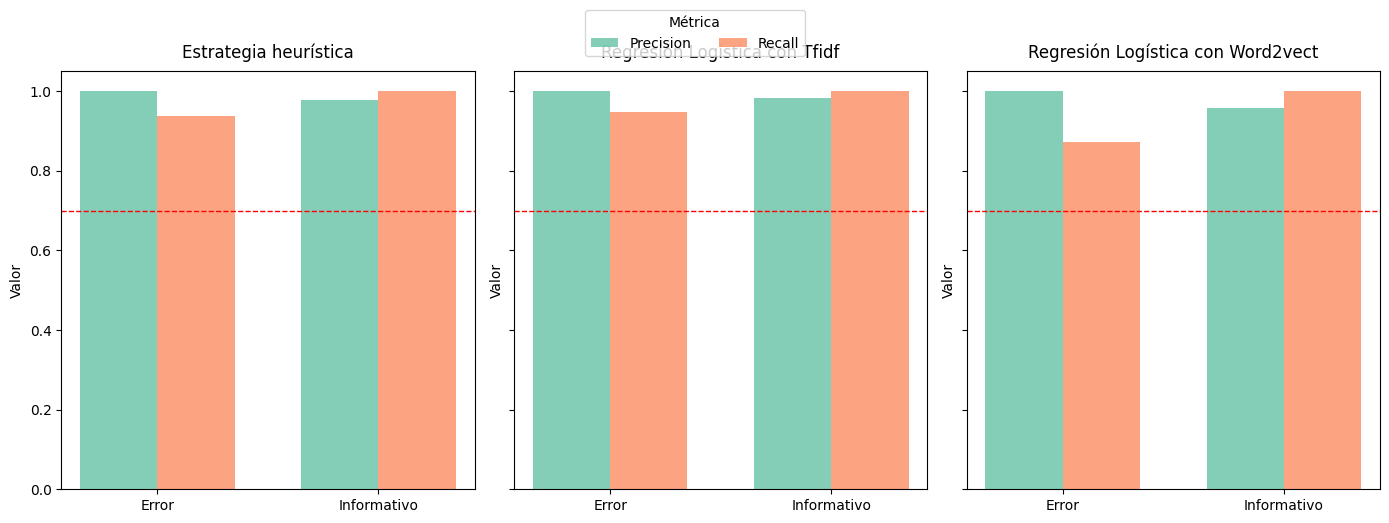

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Paleta Set2 para colores
colors = sns.color_palette("Set2", 2)

# Parámetros
#categories = ["Advertencia", "Error", "Informativo"]
categories = ["Error", "Informativo"]
metrics = ["precision", "recall"]
methods = ["EH", "LR_Tfidf", "LR_Word2vect"]

# Títulos personalizados
method_titles = {
    'EH': 'Estrategia heurística',
    'LR_Tfidf': 'Regresión Logística con Tfidf',
    'LR_Word2vect': 'Regresión Logística con Word2vect'
}

w = 0.35  # Ancho de las barras
x = np.arange(len(categories))

# Crear figura con 3 subgráficas (una por método)
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

# Crear los tres gráficos
for i, method in enumerate(methods):
    ax = axes[i]
    df_method = df_melted_source[df_melted_source["method"] == method]

    for j, metric in enumerate(metrics):
        values = df_method[df_method["metric"] == metric].set_index("group").loc[categories, "value"]
        ax.bar(x + (j - 0.5) * w, values, width=w, label=metric.capitalize(), color=colors[j], alpha=0.8)

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Valor')
    ax.axhline(0.7, ls='--', color='red', linewidth=1)
    ax.set_title(method_titles[method], fontsize=12, pad=10)

# Crear leyenda común
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Métrica', loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

# Ajustes finales
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()
